# Suscripción de clientes de bancos portugueses a un depósito trimestral (Producto)


## Campaña de marketing

1. Fuentes
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
2. Uso pasado:

      El conjunto de datos completo fue descrito y analizado en:

      S. Moro, R. Laureano y P. Cortez. Utilización de la Minería de Datos para el Marketing Directo Bancario: Una Aplicación de la Metodología CRISP-DM.
      En P. Novais et al. (Eds.), Actas de la Conferencia Europea de Simulación y Modelado - ESM'2011, pp. 117-121, Guimarães, Portugal, octubre de 2011. EUROSIS.

3. Información relevante:

   Los datos están relacionados con campañas de marketing de una institución portuguesa de bancos. 
   Las campañas de marketing fueron realizadas por llamadas móviles.A menudo,se requirió más de un contacto al mismo cliente para determinar si el producto (depósito trimestral bancario) sería o no suscrito. 

   El objetivo es predecir si el client se suscribirá a esa subscripción (variable y en el csv).

4. Número de filas: 45211

5. Numero de variables: 16 + salida.

## Descripción de las variables.


* age (numeric)
* job : type of job (categorical: "admin","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
* marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* education (categorical: "unknown","secondary","primary","tertiary")
* default: has credit in default? (binary: "yes","no")
* balance: average yearly balance, in euros (numeric) 
* housing: has housing loan? (binary: "yes","no")
* loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:
* contact: contact communication type (categorical: "unknown","telephone","cellular") 
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* duration: last contact duration, in seconds (numeric)

ther attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: "yes","no")

# Carga del csv.

Cargamos el csv que esta alojado en mi repositorio de github, para este caso los datos a tratar es un csv que viene con las características anteriormente dichas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MaxAbsScaler

url = 'https://raw.githubusercontent.com/alexander6779/SNS/main/Final_Project/bank_data/'

df = pd.read_csv(url+'bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Mostrar información de los datos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Limpieza de datos nulos y transformación de datos

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Podemos observar que no hay ningún valor nulo, por tanto no tendremos que rellenar dichos valores.

In [4]:
months = {'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11}
job = {'admin.':0,'unknown':1,'unemployed':2,'management':3,'housemaid':4,'entrepreneur':5,'student':6,'blue-collar':7,'self-employed':8,'retired':9,'technician':10,'services':11}
marital = {'married':0,'divorced':1,'single':2}
housing = {'no':0,'yes':1}
loan = {'no':0,'yes':1}
default = {'no':0,'yes':1}
education = {'unknown':0,'primary':1,'secondary':2,'tertiary':3}
contact = {'unknown':0,'telephone':1,'cellular':2}
poutcome = {'unknown':0,'success':1,'failure':2,'other':3}
y = {'no':0,'yes':1}

In [5]:
def fromCatToNum(datafr):
    cols = ['month','job','marital','housing','loan','default','education','contact','poutcome','y']
    values = {'month':months,'job':job,'marital':marital,'housing':housing,'loan':loan,'default':default,'education':education,'contact':contact,'poutcome':poutcome,'y':y}
    for i in datafr:
        if i in cols:
            datafr[i] = datafr[i].map(values[i])
fromCatToNum(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


# Eliminación de outliers

En esta primera celda vamos a guardar todas las filas las cuáles tengan un valor a 1 en la columna default, debido a que todas ellas las va a considerar un outlier, por qué, pues no encuentro una opinión que lo pueda aclarar, entiendo que puede haber una de esas filas que en general posea valores que están fuera de rango pero no todas, por tanto he decidido guardarlas y añadirlas posterior al borrado de outliers.

In [7]:
filas_default = df.loc[df['default']==1]

In [8]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

age yes
job no
marital no
education yes
default yes
balance yes
housing no
loan yes
contact no
day no
month no
duration yes
campaign yes
pdays yes
previous yes
poutcome yes
y yes


In [9]:
media = df.mean()
desvio = df.std()
limite_superior = media + 3 * desvio
limite_inferior = media - 3 * desvio
outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()

print("Media: ", media)
print()
print("Desviación estándar: ", desvio)
print()
print("Limite Superior: ", limite_superior)
print()
print("Limite Inferior: ", limite_inferior)
print()
print("Outliers: ", outliers)

Media:  age            40.936210
job             6.018159
marital         0.680963
education       2.060516
default         0.018027
balance      1362.272058
housing         0.555838
loan            0.160226
contact         1.359758
day            15.806419
month           5.144655
duration      258.163080
campaign        2.763841
pdays          40.197828
previous        0.580323
poutcome        0.372321
y               0.116985
dtype: float64

Desviación estándar:  age            10.618762
job             3.543218
marital         0.884908
education       0.778704
default         0.133049
balance      3044.765829
housing         0.496878
loan            0.366820
contact         0.897951
day             8.322476
month           2.408034
duration      257.527812
campaign        3.098021
pdays         100.128746
previous        2.303441
poutcome        0.833491
y               0.321406
dtype: float64

Limite Superior:  age             72.792496
job             16.647813
marital          3

In [10]:
df.drop(outliers.index.get_level_values(0),inplace=True)

In [11]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,38300.000000,38300.000000,38300.000000,38300.000000,38300.0,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000,38300.000000
mean,40.703003,6.014230,0.673708,2.061358,0.0,1103.449791,0.550078,0.160731,1.316997,15.843890,5.162663,235.626084,2.466057,20.727702,0.289974,0.204151,0.099713
std,10.093718,3.551927,0.883059,0.776556,0.0,1726.616446,0.497492,0.367288,0.917614,8.344106,2.384580,190.269504,1.954914,65.577071,0.960886,0.579436,0.299621
min,18.000000,0.000000,0.000000,0.000000,0.0,-4057.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,3.000000,0.000000,2.000000,0.0,76.000000,0.000000,0.000000,0.000000,8.000000,4.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,7.000000,0.000000,2.000000,0.0,442.000000,1.000000,0.000000,2.000000,16.000000,5.000000,178.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,10.000000,2.000000,3.000000,0.0,1370.000000,1.000000,0.000000,2.000000,21.000000,7.000000,306.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,72.000000,11.000000,2.000000,3.000000,0.0,10483.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1030.000000,12.000000,340.000000,7.000000,2.000000,1.000000


In [12]:
len(df)

38300

Aquí añado las filas anteirormente mencionadas.

In [13]:
df = df.append(filas_default,ignore_index=False)
len(df)

<ipython-input-13-243d1579a401>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(filas_default,ignore_index=False)


39115

Aún así vemos que ha borrado un número considerable de filas.

Comprobamos que finalmente tampoco aparezcan duplicados en nuestro dataframe

In [14]:
df.duplicated().sum() 

0

# Matriz de correlación

La matriz de correlación nos va a ayudar a tomar decisiones para elegir los datos de entrenamiento, de manera que nos va a indicar cuanta correlación existe entre todas las variables, siendo el orden de 1 variable y ver la correlación con todas las demás, así hasta la última.

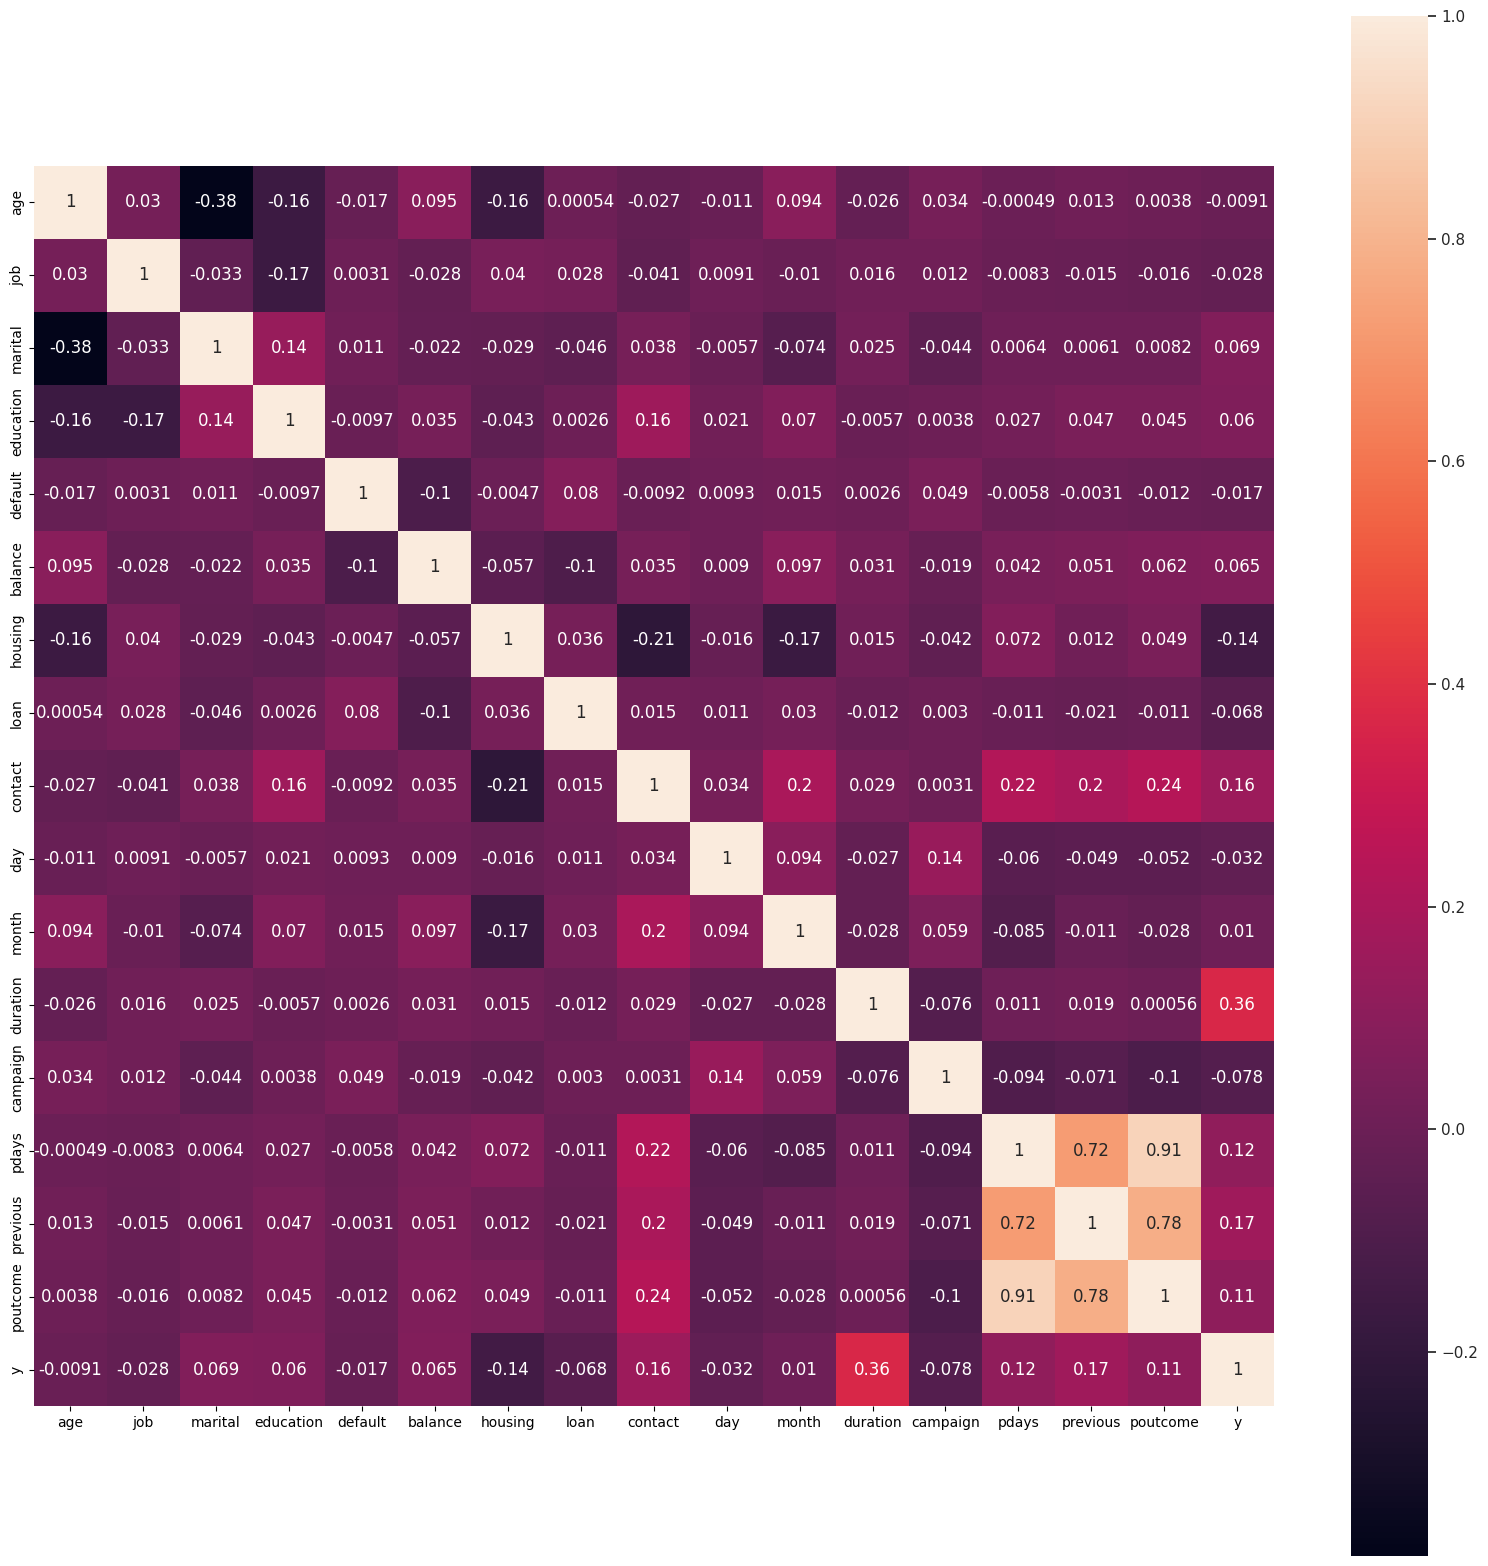

In [15]:
fig,ax = plt.subplots(figsize=(20,20))
sns.set()
sns.heatmap(df.corr(), square=True, annot=True)
plt.show()

# Pairplot

Gráfica para comparar las variables del dataframe.

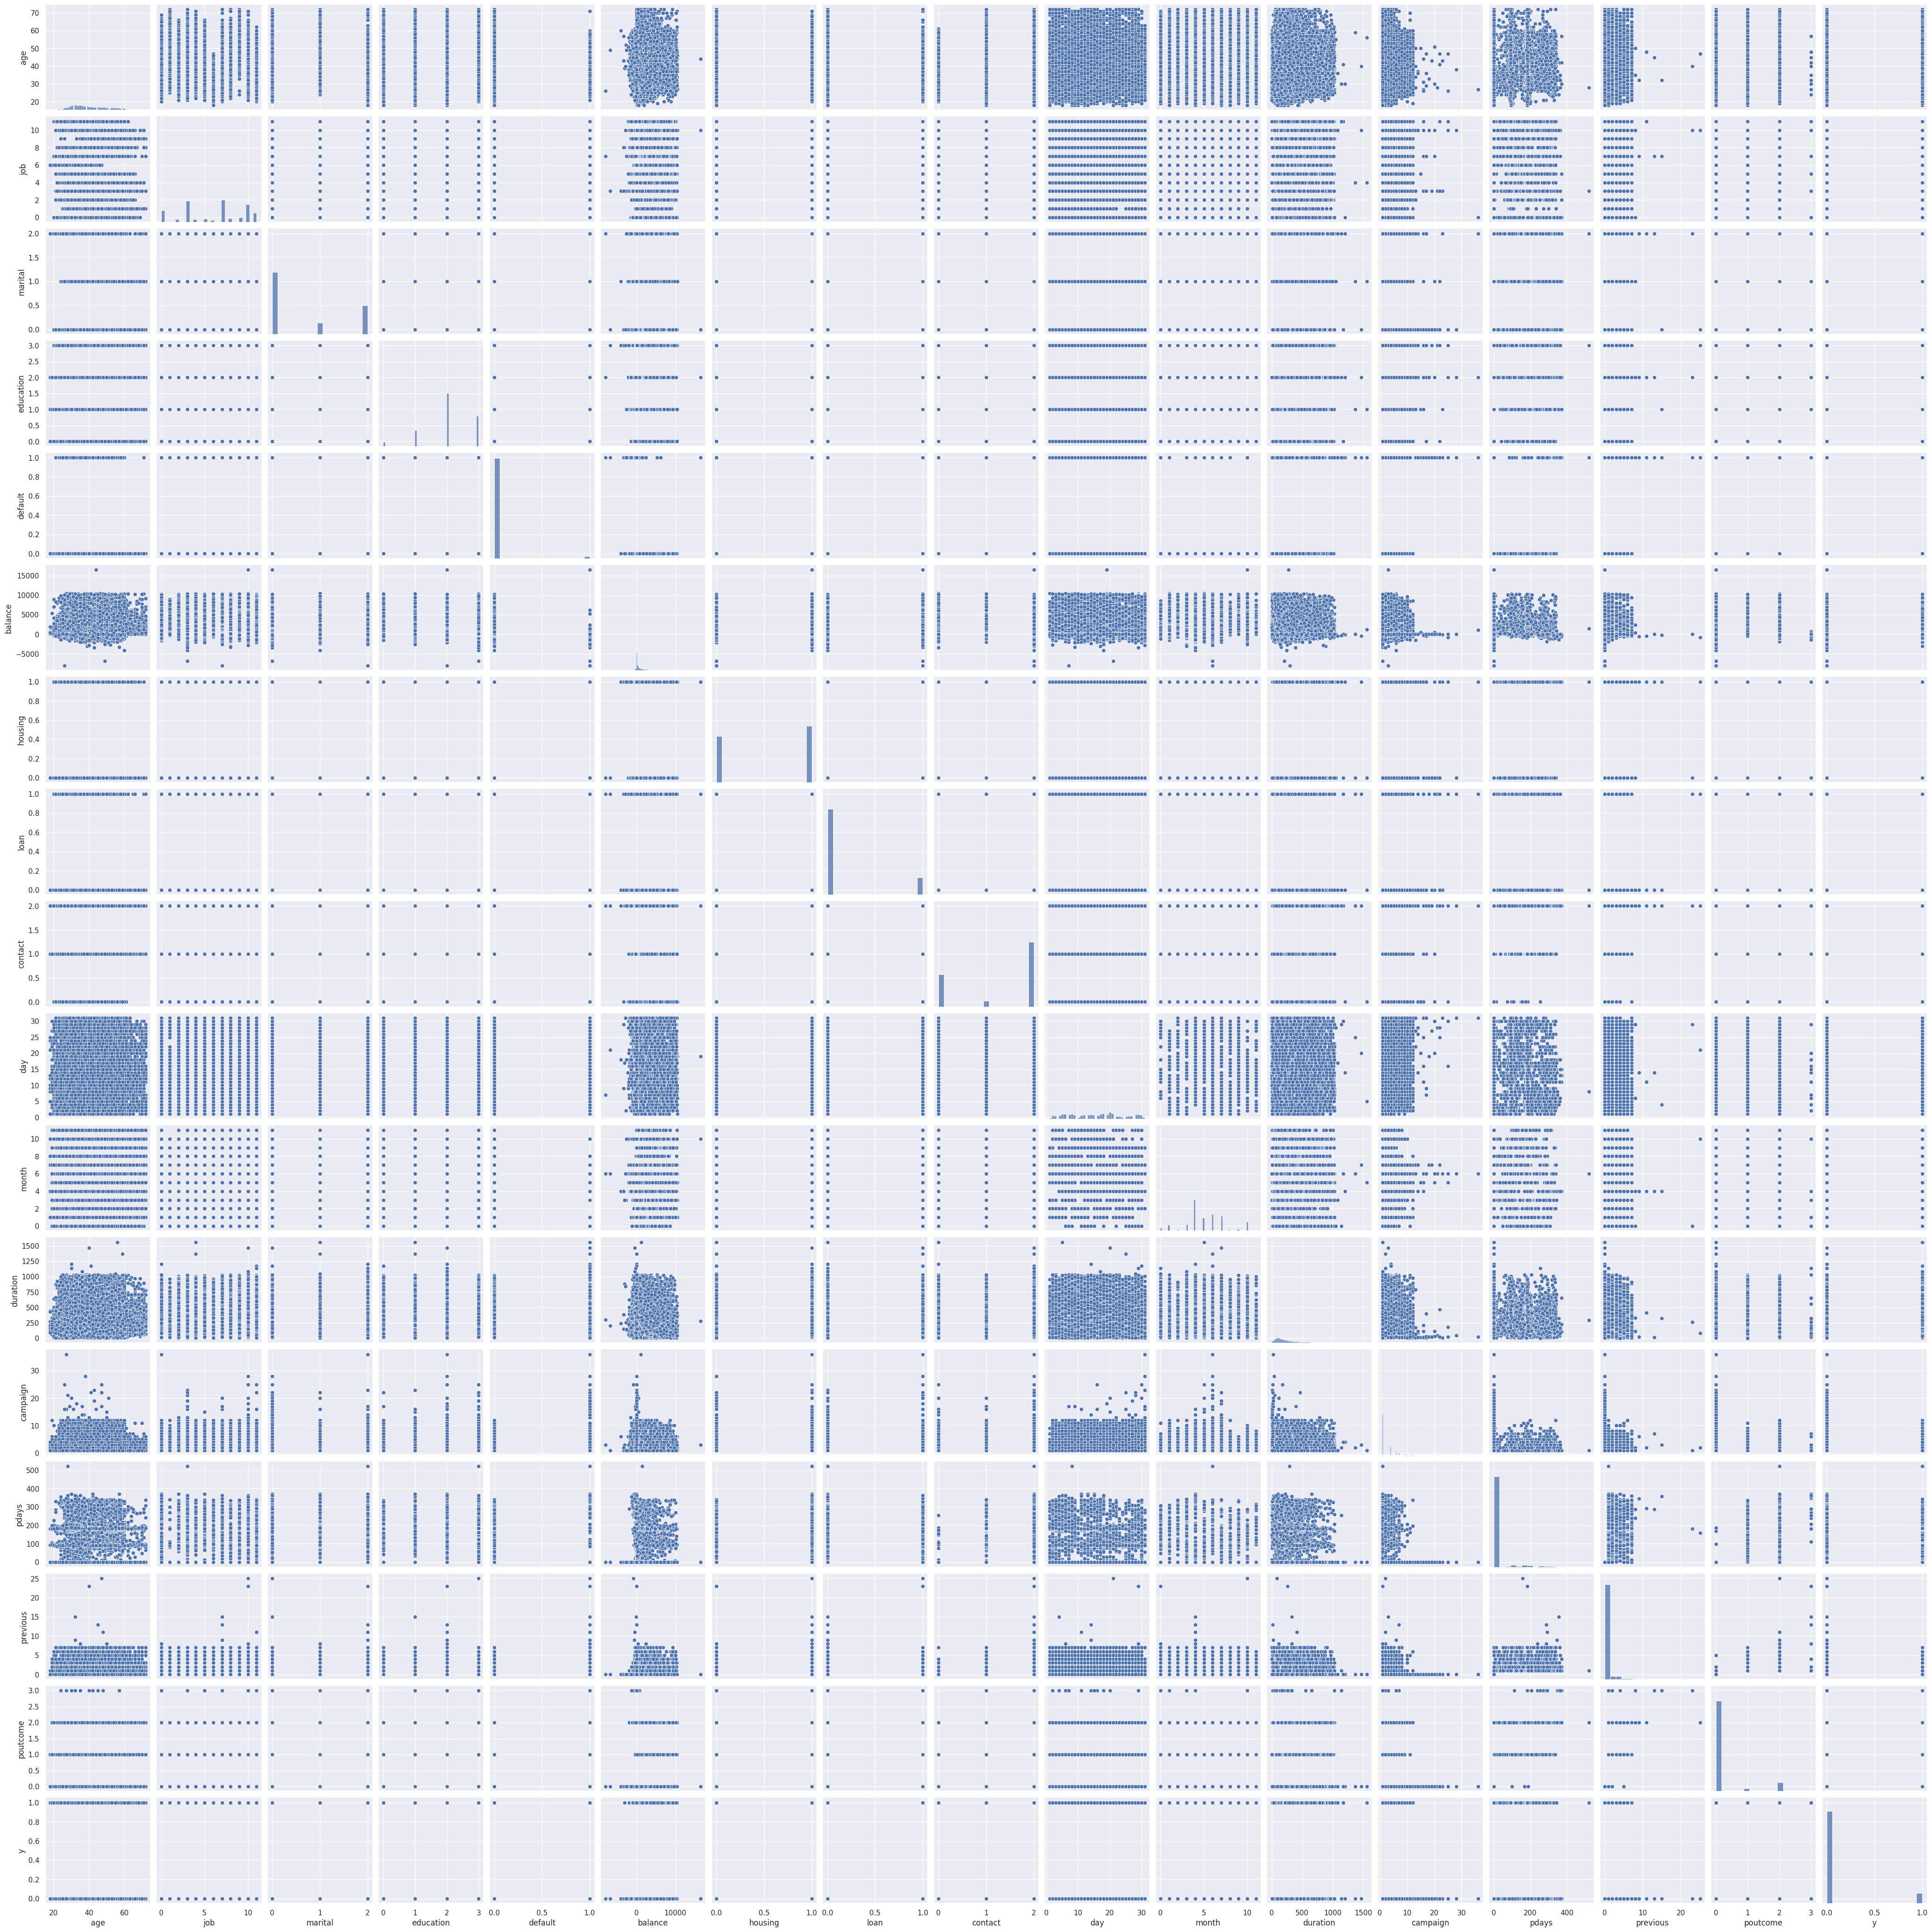

In [16]:
sns.pairplot(df)